# Anomaly Detection
### Outlier Detection - Algorithms used: Isolation Forest, Local Outlier Factor, One Class SVM
### Feature Used: Mean based values

### Import the Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Inspecting a single file

In [2]:
#single_file - 1 second vibration signal
single_file = pd.read_csv('D:/Springboard/Capstone_Works/Project/Proj_DataSet/2nd_test/2004.02.12.10.32.39',sep='\t')

In [3]:
# Insert Column headers 
single_file.columns = ['Bearing1', 'Bearing2', 'Bearing3', 'Bearing4']

In [4]:
# Describing the stats of single_file - 1 second vibration signal
single_file.describe()

,Bearing1,Bearing2,Bearing3,Bearing4
count,20479.000000,20479.000000,20479.000000,20479.000000
mean,-0.010194,-0.012692,-0.014535,-0.010026
std,0.073478,0.090057,0.108436,0.053169
min,-0.386000,-0.513000,-0.911000,-0.264000
25%,-0.059000,-0.073000,-0.081000,-0.046000
50%,-0.010000,-0.015000,-0.015000,-0.010000
75%,0.037000,0.046000,0.051000,0.027000
max,0.454000,0.464000,1.023000,0.193000


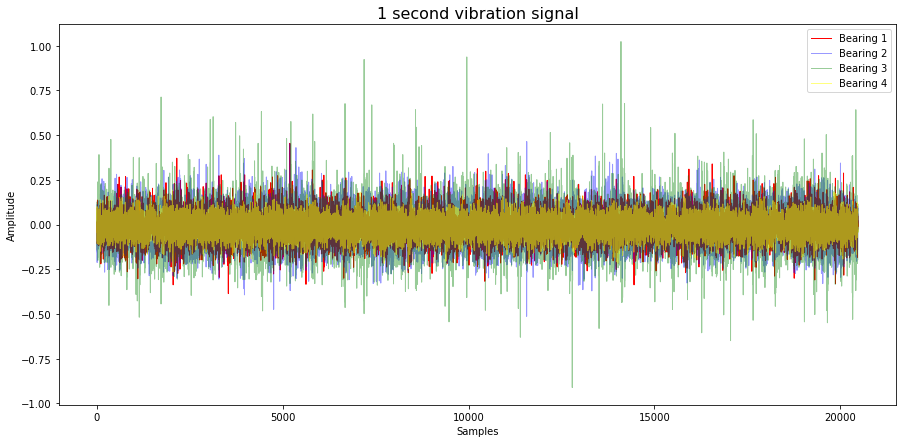

In [5]:
# Plot of single_file - 1 second vibration signal
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(single_file['Bearing1'], label='Bearing 1', color='red', linewidth=1,alpha=1)
ax.plot(single_file['Bearing2'], label='Bearing 2', color='blue', linewidth=1,alpha=0.4)
ax.plot(single_file['Bearing3'], label='Bearing 3', color='green', linewidth=1,alpha=0.4)
ax.plot(single_file['Bearing4'], label='Bearing 4', color='yellow', linewidth=1,alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Samples')
plt.ylabel("Amplitude")
ax.set_title('1 second vibration signal', fontsize=16)
plt.show()

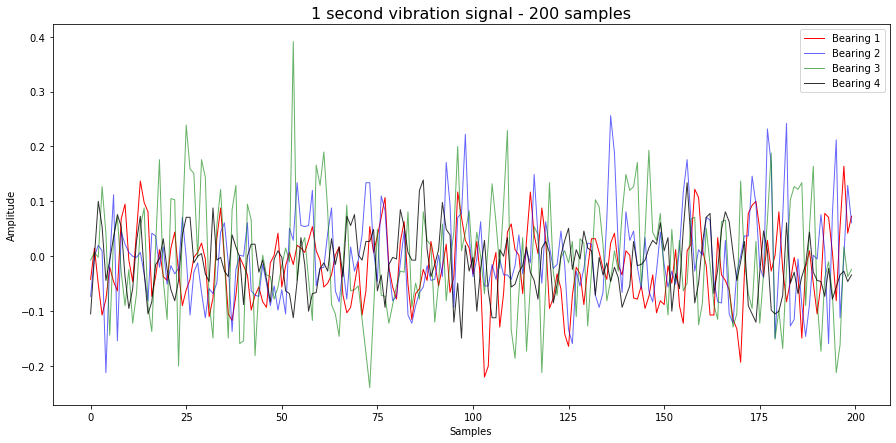

In [6]:
# Plot of single_file - 1 second vibration signal - first 200 samples
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(single_file['Bearing1'][0:200], label='Bearing 1', color='red', linewidth=1)
ax.plot(single_file['Bearing2'][0:200], label='Bearing 2', color='blue', linewidth=1,alpha=0.6)
ax.plot(single_file['Bearing3'][0:200], label='Bearing 3', color='green', linewidth=1,alpha=0.6)
ax.plot(single_file['Bearing4'][0:200], label='Bearing 4', color='black', linewidth=1,alpha=0.8)
plt.legend(loc='best')
plt.xlabel('Samples')
plt.ylabel("Amplitude")
ax.set_title('1 second vibration signal - 200 samples', fontsize=16)
plt.show()

## Load and combine the Dataset

In [7]:
# Create the blank dataframe
combined_data = pd.DataFrame()

# Set the file directory
data_dir = 'D:/Springboard/Capstone_Works/Project/Proj_DataSet/2nd_test'

# Iterate through all the files
for file_name in os.listdir(data_dir):
    df = pd.read_csv(os.path.join(data_dir, file_name), sep='\t')
    
    # To get the absolute mean value of each file
    df_mean_abs = np.array(df.abs().mean())
    df_mean_abs = pd.DataFrame(df_mean_abs.reshape(1,4))
    
    # Set the index as date_time, which is the name of the file
    df_mean_abs.index = [file_name]
    
    # Append individual dataframes to create a single combined dataset
    combined_data = combined_data.append(df_mean_abs)
    
# Insert Column headers    
combined_data.columns = ['Bearing1', 'Bearing2', 'Bearing3', 'Bearing4']

In [8]:
# Printing the combined_data
print(combined_data.head(5))
print(combined_data.shape)

                     Bearing1  Bearing2  Bearing3  Bearing4
2004.02.12.10.32.39  0.058333  0.071832  0.083242  0.043067
2004.02.12.10.42.39  0.058995  0.074006  0.084435  0.044541
2004.02.12.10.52.39  0.060236  0.074227  0.083926  0.044443
2004.02.12.11.02.39  0.061455  0.073844  0.084457  0.045081
2004.02.12.11.12.39  0.061361  0.075609  0.082837  0.045118
(984, 4)


### Sort the dataset with data_time as index

In [9]:
# Set the data_time index and ensuring the proper format
combined_data.index = pd.to_datetime(combined_data.index, format='%Y.%m.%d.%H.%M.%S')

# Sort the index in chronological order
combined_data = combined_data.sort_index()


# Printing the combined_data
print(combined_data.head(5))
print(combined_data.shape)

                     Bearing1  Bearing2  Bearing3  Bearing4
2004-02-12 10:32:39  0.058333  0.071832  0.083242  0.043067
2004-02-12 10:42:39  0.058995  0.074006  0.084435  0.044541
2004-02-12 10:52:39  0.060236  0.074227  0.083926  0.044443
2004-02-12 11:02:39  0.061455  0.073844  0.084457  0.045081
2004-02-12 11:12:39  0.061361  0.075609  0.082837  0.045118
(984, 4)


## Visualizing the data

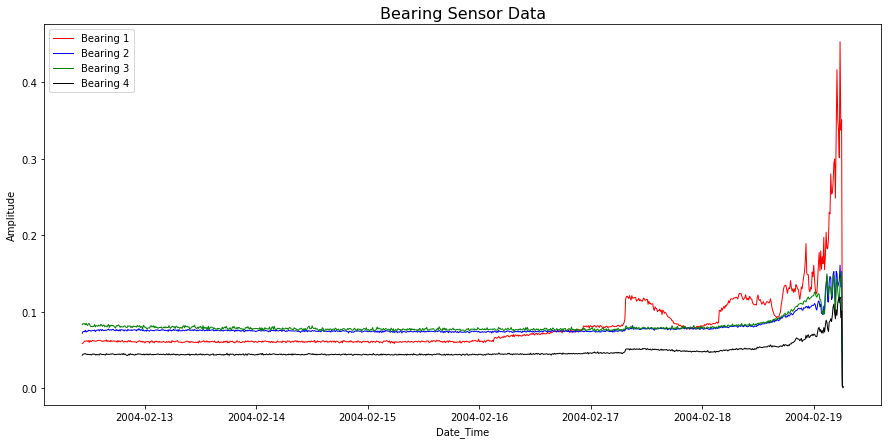

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(combined_data['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(combined_data['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(combined_data['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(combined_data['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Date_Time')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()

### Drop last 2 rows. As the bearings failed, the machine is stopped and the vibrations becomes zero. (Near 0)

In [11]:
print(combined_data.tail(5))
combined_data = combined_data[:-2]
combined_data.shape

                     Bearing1  Bearing2  Bearing3  Bearing4
2004-02-19 05:42:39  0.453335  0.161016  0.137440  0.119047
2004-02-19 05:52:39  0.337583  0.132400  0.144992  0.092125
2004-02-19 06:02:39  0.351111  0.152266  0.151299  0.100817
2004-02-19 06:12:39  0.001857  0.003732  0.003656  0.001786
2004-02-19 06:22:39  0.001168  0.000767  0.000716  0.001699


(982, 4)

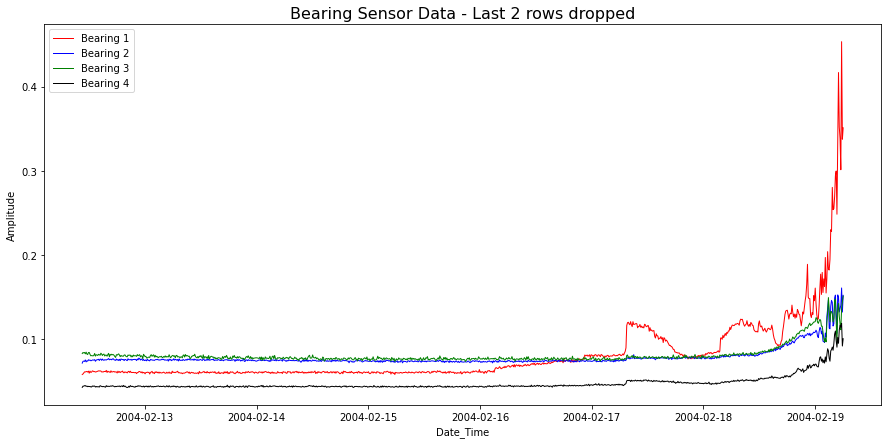

In [12]:
# Visualizing the data - last 2 rows dropped
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(combined_data['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(combined_data['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(combined_data['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(combined_data['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Date_Time')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data - Last 2 rows dropped', fontsize=16)
plt.show()

### New Dataframe for EDA with time_steps (Samples) as index

In [13]:
new_comb_data = combined_data.copy()
new_comb_data['time_steps'] = np.arange(0,len(combined_data))
new_comb_data.index = new_comb_data['time_steps']
new_comb_data.drop(['time_steps'],axis=1,inplace=True)
new_comb_data.head(5)

,Bearing1,Bearing2,Bearing3,Bearing4
time_steps,,,,
0,0.058333,0.071832,0.083242,0.043067
1,0.058995,0.074006,0.084435,0.044541
2,0.060236,0.074227,0.083926,0.044443
3,0.061455,0.073844,0.084457,0.045081
4,0.061361,0.075609,0.082837,0.045118


### Visualize the dataset with samples as index

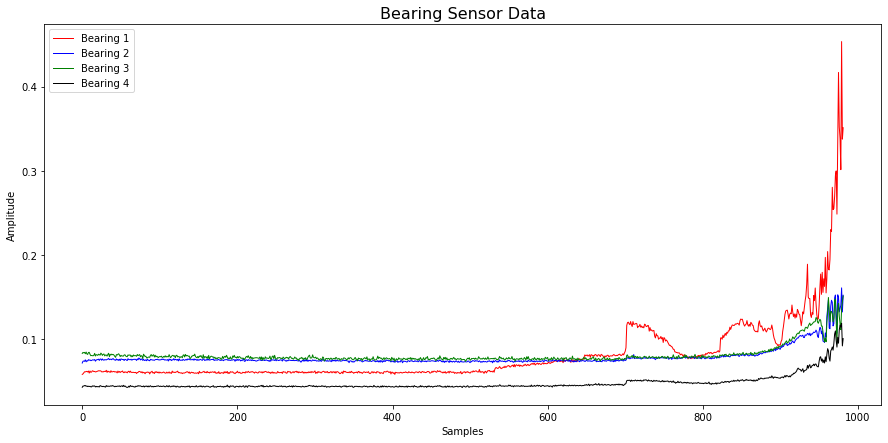

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(new_comb_data['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(new_comb_data['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(new_comb_data['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(new_comb_data['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()

### Univariate Anomaly Detection - Bearing 1
### Statistical Process Control Method (mean + 3sigma thresholding)

In [15]:
# Calculate Threshold for Bearing 1
# Based on dataset description, Bearing 1 is failed at the end of this dataset. 
# Hence, We are considering only the feature "Bearing 1" to calculate the threshold
# As this a run to failure test first new hundred samples are considered as normal values
bearing1_200_samples = combined_data['Bearing1'][0:200]
mean_bearing1 = bearing1_200_samples.mean()
three_sigma_bearing1 = 3 * bearing1_200_samples.std()
threshold_bearing1 = mean_bearing1 + three_sigma_bearing1
print('Threshold Bearing1: ', threshold_bearing1)

Threshold Bearing1:  0.06347716413179501


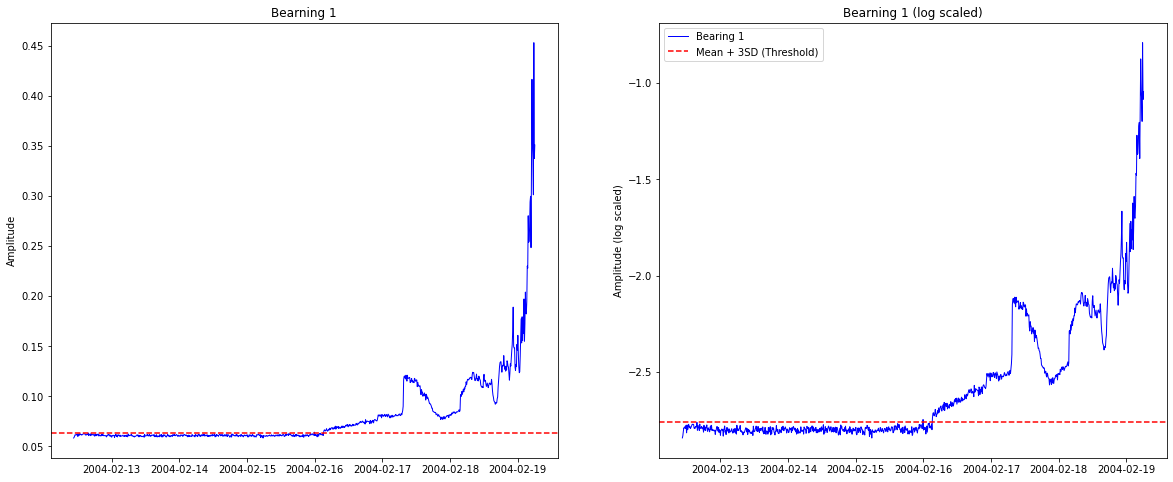

In [16]:
# Visualizing - Univariate Anomaly Detection - Bearing 1
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
ax[0].plot(combined_data['Bearing1'], label='Bearing 1', color='blue',linewidth=1)
ax[0].axhline(threshold_bearing1, color="red", linestyle="--", label='Mean + 3SD (Threshold)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Bearning 1')
ax[1].plot(np.log(combined_data['Bearing1']), label='Bearing 1', color='blue',linewidth=1)
ax[1].axhline(np.log(threshold_bearing1), color="red", linestyle="--", label='Mean + 3SD (Threshold)')
ax[1].set_ylabel('Amplitude (log scaled)')
ax[1].set_title('Bearning 1 (log scaled)')
plt.legend()

### Based on visual interpretation, we see that anomaly has occured three days before the actual failure.

## Split the dataset into normal (Training Set) and abnormal data
### The model is trained only with the normal data. As this data will only be available at the starting time of the process. In realtime, we don't have access to the anomaly data at an early stage.
### Once the anomaly detection algorithm learns the normal data (training data), it can determine whether a test instance belongs to the normal class or if it is an anomaly.
## Normal data - Training data

In [17]:
# Based on Threshold calculated from bearing 1
normal_data = new_comb_data[new_comb_data['Bearing1']<threshold_bearing1]
abnormal_data = new_comb_data[new_comb_data['Bearing1']>threshold_bearing1]
print("Normal Data Shape", normal_data.shape)
print("AbNormal Data Shape",abnormal_data.shape)

Normal Data Shape (531, 4)
AbNormal Data Shape (451, 4)


### Visualizing Normal Range

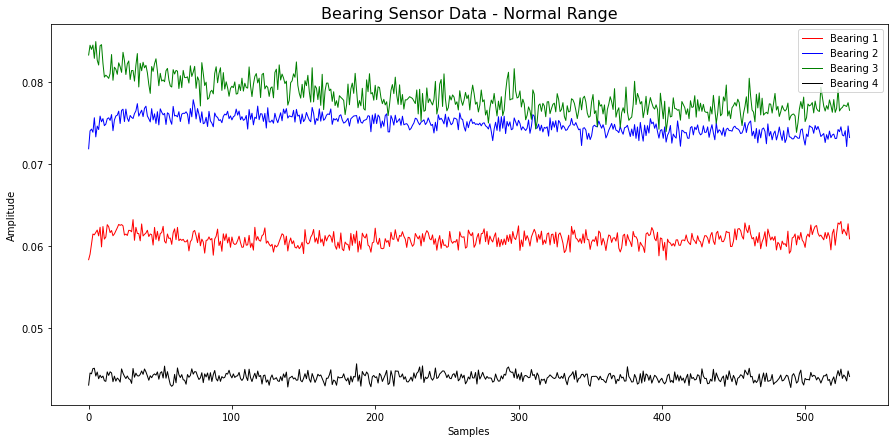

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(normal_data['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(normal_data['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(normal_data['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(normal_data['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data - Normal Range', fontsize=16)
plt.show()

### Visualizing Abnormal Range

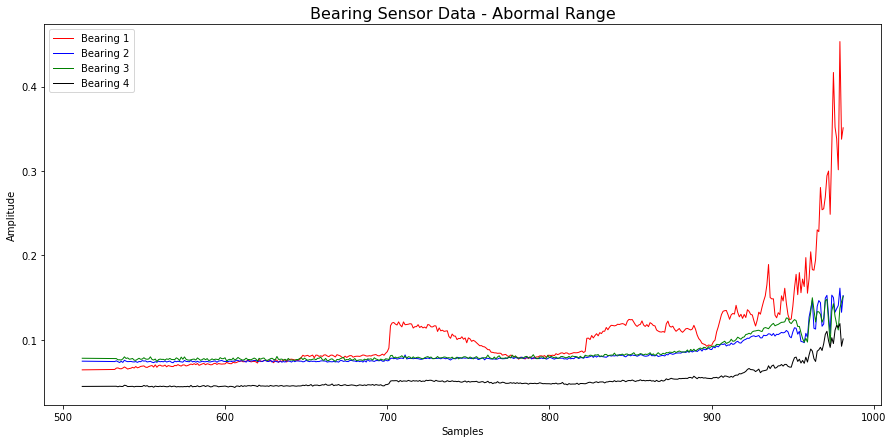

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(abnormal_data['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(abnormal_data['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(abnormal_data['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(abnormal_data['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data - Abormal Range', fontsize=16)
plt.show()

## Anomaly Detection - Outlier Detection
### One class classification algorithms - Isolation Forest, Local Outlier factor, One Class SVM
### Bearning 1 data is only considered for both training and testing.

## Isolation Forest

In [20]:
# Training the model with normal data
from sklearn.ensemble import IsolationForest
bearing1_ifmodel = IsolationForest(max_samples=100, random_state=0,contamination=0.005)
bearing1_ifmodel.fit(normal_data[['Bearing1']])

IsolationForest(contamination=0.005, max_samples=100, random_state=0)

In [21]:
# Testing on normal data
y_pred_normal = bearing1_ifmodel.predict(normal_data[['Bearing1']])
unique_elements, counts_elements = np.unique(y_pred_normal, return_counts=True)
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")

Anomaly	-1	3
Normal 	1	528


In [22]:
# Testing on Abnormal data
y_pred_abnormal = bearing1_ifmodel.predict(abnormal_data[['Bearing1']])
unique_elements, counts_elements = np.unique(y_pred_abnormal, return_counts=True)
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")

Anomaly	-1	451
No Normal data


In [23]:
# Testing on normal & Abnormal data
nor_abnor1 = new_comb_data.iloc[400:600,0].values
y_pred_nor_abnor = bearing1_ifmodel.predict(nor_abnor1.reshape(-1,1))
unique_elements, counts_elements = np.unique(y_pred_nor_abnor, return_counts=True)
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")

Anomaly	-1	70
Normal 	1	130


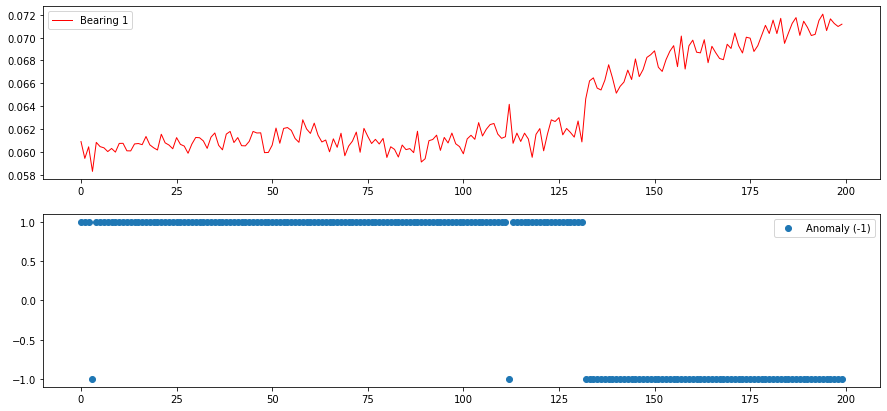

In [24]:
# Visualizing the results
fig, ax = plt.subplots(nrows=2,figsize=(15,7))
ax[0].plot(nor_abnor1, label='Bearing 1', color='red',linewidth=1)
ax[1].scatter(range(0,len(y_pred_nor_abnor)),y_pred_nor_abnor, label='Anomaly (-1)')
ax[0].legend()
ax[1].legend()

Text(0.5, 1.0, 'Bearing 1')

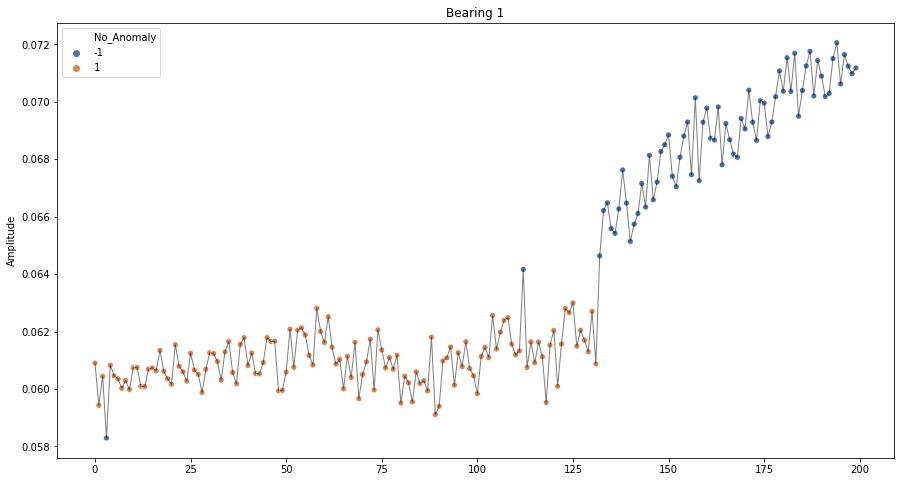

In [25]:
# Visualizing the results - DataFrame
viz_df=pd.DataFrame({'Bearing1':nor_abnor1,'No_Anomaly':y_pred_nor_abnor})
plt.figure(figsize=(15,8))
sns.scatterplot(x=range(0,len(viz_df)),y=viz_df.Bearing1,hue=viz_df.No_Anomaly,palette="deep")
plt.plot(nor_abnor1, color='black',linewidth=1,alpha=0.5)
plt.ylabel('Amplitude')
plt.title('Bearing 1')

### In the above plot, anomalies are described as -1 (Blue points) and normal values are mentioned as 1 (Yellow points).

## Testing Isolation Forest on full dataset

Anomaly	-1	454
Normal 	1	528


Text(0.5, 1.0, 'Bearing 1 (Entire Range)')

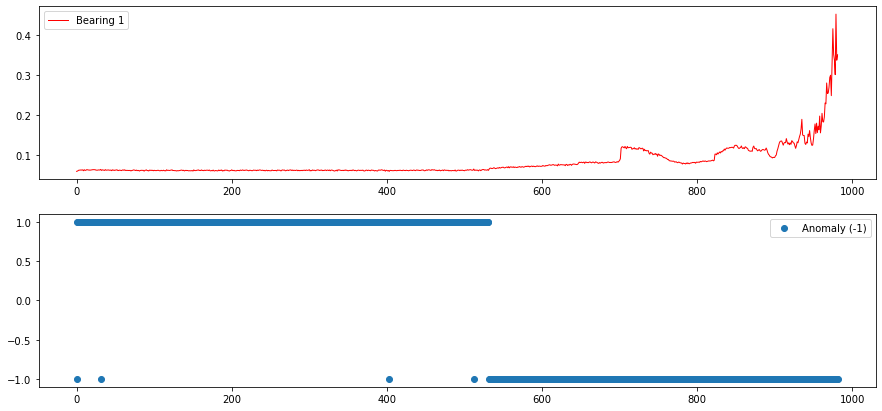

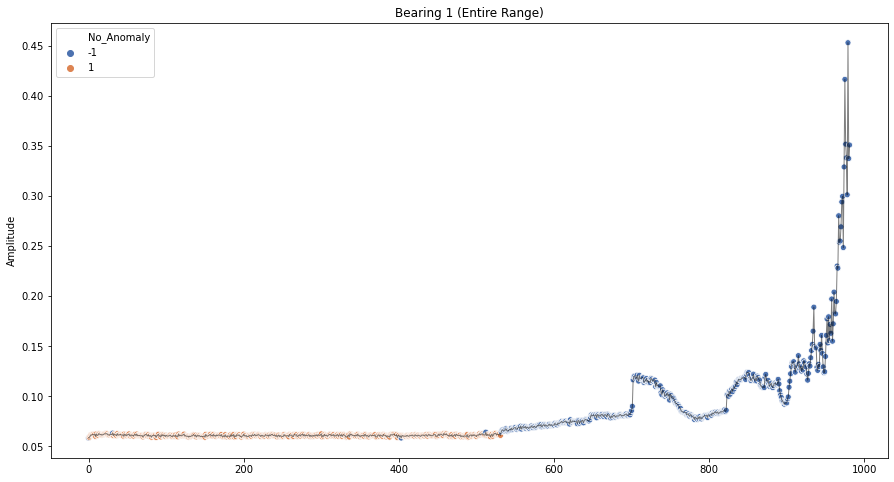

In [26]:
# Testing on full dataset (entire range)
nor_abnor1 = new_comb_data.iloc[:,0].values
y_pred_nor_abnor = bearing1_ifmodel.predict(nor_abnor1.reshape(-1,1))
unique_elements, counts_elements = np.unique(y_pred_nor_abnor, return_counts=True)
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")
# Visualizing the results
fig, ax = plt.subplots(nrows=2,figsize=(15,7))
ax[0].plot(nor_abnor1, label='Bearing 1', color='red',linewidth=1)
ax[1].scatter(range(0,len(y_pred_nor_abnor)),y_pred_nor_abnor, label='Anomaly (-1)')
ax[0].legend()
ax[1].legend()
# Visualizing the results - DataFrame
viz_df=pd.DataFrame({'Bearing1':nor_abnor1,'No_Anomaly':y_pred_nor_abnor})
plt.figure(figsize=(15,8))
sns.scatterplot(x=range(0,len(viz_df)),y=viz_df.Bearing1,hue=viz_df.No_Anomaly,palette="deep")
plt.plot(nor_abnor1, color='black',linewidth=1,alpha=0.5)
plt.ylabel('Amplitude')
plt.title('Bearing 1 (Entire Range)')

## Local Outlier Factor

In [27]:
# Training using Normal data
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.005,novelty=True)
clf.fit(normal_data[['Bearing1']])

LocalOutlierFactor(contamination=0.005, novelty=True)

Anomaly	-1	453
Normal 	1	529


Text(0.5, 1.0, 'Bearing 1 (Entire Range)')

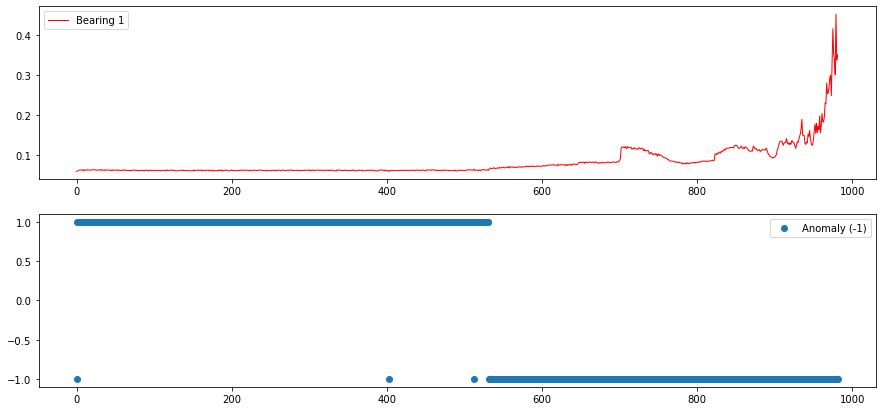

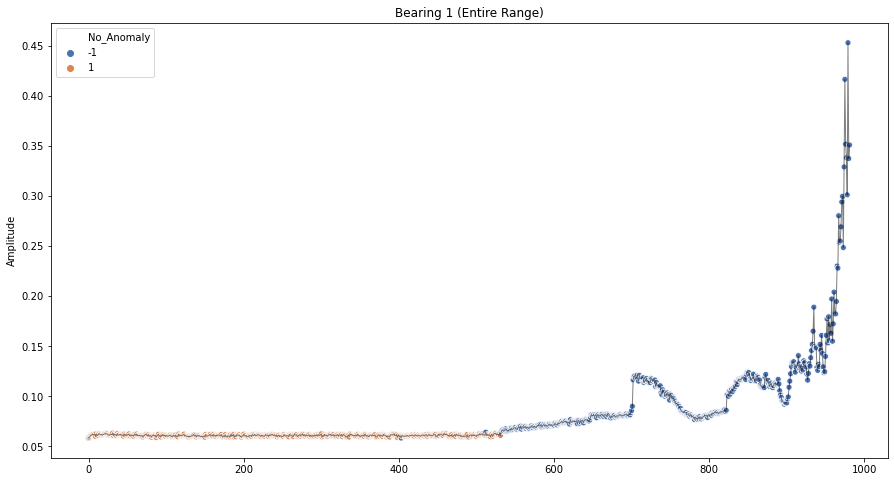

In [28]:
# Testing using entire full range data
y_pred = clf.predict(nor_abnor1.reshape(-1,1))
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")
# Visualizing the results
fig, ax = plt.subplots(nrows=2,figsize=(15,7))
ax[0].plot(nor_abnor1, label='Bearing 1', color='red',linewidth=1)
ax[1].scatter(range(0,len(y_pred)),y_pred, label='Anomaly (-1)')
ax[0].legend()
ax[1].legend()
# Visualizing the results - DataFrame
viz_df=pd.DataFrame({'Bearing1':nor_abnor1,'No_Anomaly':y_pred})
plt.figure(figsize=(15,8))
sns.scatterplot(x=range(0,len(viz_df)),y=viz_df.Bearing1,hue=viz_df.No_Anomaly,palette="deep")
plt.plot(nor_abnor1, color='black',linewidth=1,alpha=0.5)
plt.ylabel('Amplitude')
plt.title('Bearing 1 (Entire Range)')

### The performance of Local Outlier Factor is similar or slightly better over Isolation Forest

## One Class SVM

In [29]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel='rbf',gamma='auto')
ocsvm.fit(normal_data[['Bearing1']])

OneClassSVM(gamma='auto')

Anomaly	-1	539
Normal 	1	443


Text(0.5, 1.0, 'Bearing 1 (Entire Range)')

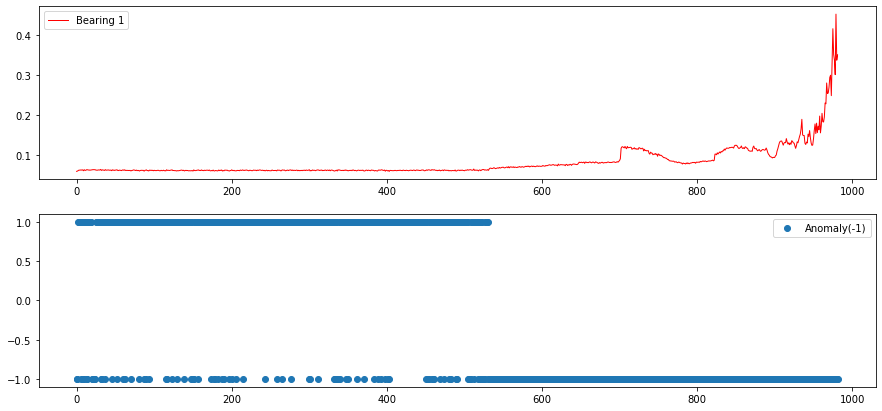

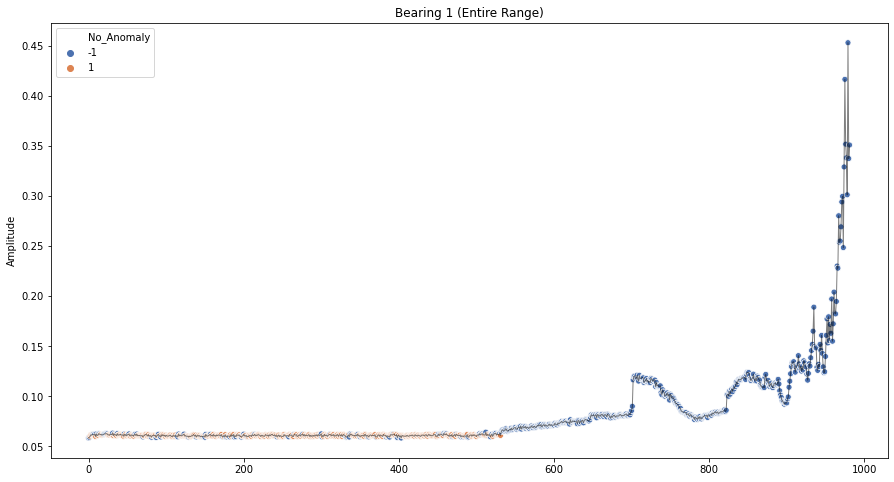

In [30]:
# Testing using entire full range data
y_pred = ocsvm.predict(nor_abnor1.reshape(-1,1))
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")
# Visualizing the results
fig, ax = plt.subplots(nrows=2,figsize=(15,7))
ax[0].plot(nor_abnor1, label='Bearing 1', color='red',linewidth=1)
ax[1].scatter(range(0,len(y_pred)),y_pred, label='Anomaly(-1)')
ax[0].legend()
ax[1].legend()
# Visualizing the results - DataFrame
viz_df=pd.DataFrame({'Bearing1':nor_abnor1,'No_Anomaly':y_pred})
plt.figure(figsize=(15,8))
sns.scatterplot(x=range(0,len(viz_df)),y=viz_df.Bearing1,hue=viz_df.No_Anomaly,palette="deep")
plt.plot(nor_abnor1, color='black',linewidth=1,alpha=0.5)
plt.ylabel('Amplitude')
plt.title('Bearing 1 (Entire Range)')

### When compared with Isolation Forest and Local Outlier Factor, One Class SVM does not perform well. 
#### Link:https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection